In [1]:
#Using matplotlib to create a visual of a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. 
#The area between the record high and record low temperatures for each day has been shaded.
#We Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
#We Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
#We Make the visual nice and also Consider issues such as legends, labels, and chart junk.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import re

In [33]:
data = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

In [34]:
data["Date"] = pd.to_datetime(data["Date"])
data[((data["Date"].dt.day == 29) & (data["Date"].dt.month == 2))]["Date"].dt.year.unique()

array([2012, 2008])

In [35]:
#Watching out for leap days (i.e. February 29th), we are removing these points from the dataset for the purpose of this visualization.
data = data[~((data["Date"].dt.day == 29) & (data["Date"].dt.month == 2))]
data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [36]:
data["dayofyear"] = data["Date"].dt.dayofyear
index = data[(data["dayofyear"]>60)&((data["Date"].dt.year==2008)|(data["Date"].dt.year==2012))].index 
len(index)

26042

In [37]:
for i in index:
    data.loc[i,"dayofyear"] -= 1

In [38]:
dayofyear = np.sort(data["dayofyear"].unique())
dayofyear

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [39]:
TMAX = data[(data["Element"]=="TMAX")&(data["Date"].dt.year>=2005)&(data["Date"].dt.year<=2014)]
TMIN = data[(data["Element"]=="TMIN")&(data["Date"].dt.year>=2005)&(data["Date"].dt.year<=2014)]
TMAX15 = data[(data["Element"]=="TMAX")&(data["Date"].dt.year==2015)]
TMIN15 = data[(data["Element"]=="TMIN")&(data["Date"].dt.year==2015)]

In [40]:
max_temp = []
min_temp = []
max_temp15 = []
min_temp15 = []

for day in dayofyear:
    max_temp.append(TMAX[TMAX["Date"].dt.dayofyear == day]["Data_Value"].max())
    min_temp.append(TMIN[TMIN["Date"].dt.dayofyear == day]["Data_Value"].min())
    max_temp15.append(TMAX15[TMAX15["Date"].dt.dayofyear == day]["Data_Value"].max())
    min_temp15.append(TMIN15[TMIN15["Date"].dt.dayofyear == day]["Data_Value"].min())

In [28]:
extremes=[]
ex_index = []
for day in dayofyear:
    if(max_temp15[day-1]>max_temp[day-1]):
        extremes.append(max_temp15[day-1])
        ex_index.append(day)
    elif(min_temp15[day-1]<min_temp[day-1]):
        extremes.append(min_temp15[day-1])
        ex_index.append(day)
np.array(extremes)
np.array(ex_index)

array([  5,  11,  34,  40,  45,  46,  47,  48,  50,  51,  52,  54,  55,
        56,  57,  58,  59,  64,  65,  66,  87,  88,  89, 107, 114, 115,
       127, 128, 131, 138, 153, 184, 191, 208, 210, 240, 250, 259, 260,
       261, 271, 272, 290, 291, 292, 293, 294, 306, 307, 308, 309, 322,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 357, 358, 359,
       360])

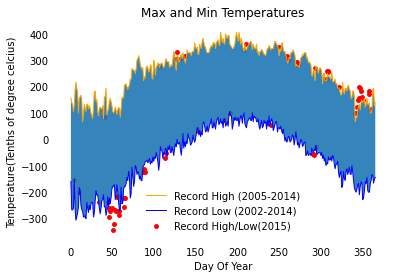

In [45]:
plt.figure()

plt.plot(dayofyear,max_temp,c="orange",lw=1.0)
plt.plot(dayofyear,min_temp,c="blue",lw=1.0)

plt.scatter(ex_index,extremes,c="red",s=15)

plt.xlabel("Day Of Year")
plt.ylabel("Temperature(Tenths of degree celcius)")
plt.title("Max and Min Temperatures")
plt.legend(["Record High (2005-2014)","Record Low (2002-2014)","Record High/Low(2015)"],frameon=False)
plt.fill_between(dayofyear,max_temp,min_temp,alpha=0.9)

ax = plt.gca()

for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False,left=False)